In [401]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Desicion Tree

### Leer datos

In [402]:
data_ingreso = pd.read_csv('./clasificacion_ingreso.csv', index_col=0)
data_ingreso.head()

,hora_inicio_viaje,p31_hora_llegada,tiempo_viaje,p17_Id_motivo_viaje,p30_camino_cuadras,p30_camino_minutos,p32_lunes,p32_martes,p32_miercoles,p32_jueves,p32_viernes,p32_sabado,p32_domingo,p32_ocasional,p33_aplicacion_antes_viaje,modo_principal,etiqueta_ingresos,edad,p15v_subsidio_SITP,A-ITTP
0,0.3333,0.3542,30.0,ver a alguien,5.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,SITP,Ingreso_medio,37,4.0,180.41
2,0.2500,0.3125,90.0,trabajo,4.0,15.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,SITP,Ingreso_bajo,28,4.0,303.53
3,0.3333,0.3472,20.0,trabajo,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,SITP,Ingreso_medio,21,4.0,54.64
12,0.2292,0.2500,30.0,trabajo,10.0,30.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,A pie,Ingreso_bajo,48,4.0,1.38
13,0.6285,0.6319,5.0,trabajo,3.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,A pie,Ingreso_medio,32,4.0,379.59


### Variables categoricas a float

In [403]:
y = data_ingreso['etiqueta_ingresos']
print(y.head())

X = data_ingreso.drop('etiqueta_ingresos', axis=1)
# convert categorical variables to float
X = pd.get_dummies(X, dtype=float)
print(X.head())


0     Ingreso_medio
2      Ingreso_bajo
3     Ingreso_medio
12     Ingreso_bajo
13    Ingreso_medio
Name: etiqueta_ingresos, dtype: object
    hora_inicio_viaje  p31_hora_llegada  tiempo_viaje  p30_camino_cuadras  \
0              0.3333            0.3542          30.0                 5.0   
2              0.2500            0.3125          90.0                 4.0   
3              0.3333            0.3472          20.0                 5.0   
12             0.2292            0.2500          30.0                10.0   
13             0.6285            0.6319           5.0                 3.0   

    p30_camino_minutos  p32_lunes  p32_martes  p32_miercoles  p32_jueves  \
0                  5.0        1.0         0.0            0.0         0.0   
2                 15.0        1.0         1.0            1.0         1.0   
3                  5.0        1.0         1.0            1.0         1.0   
12                30.0        1.0         1.0            1.0         1.0   
13                

### Split dataset 0.7 train y 0.3 test

In [404]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [405]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [406]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8397745024791143


## Arbol de decision matriz de confusion y metricas

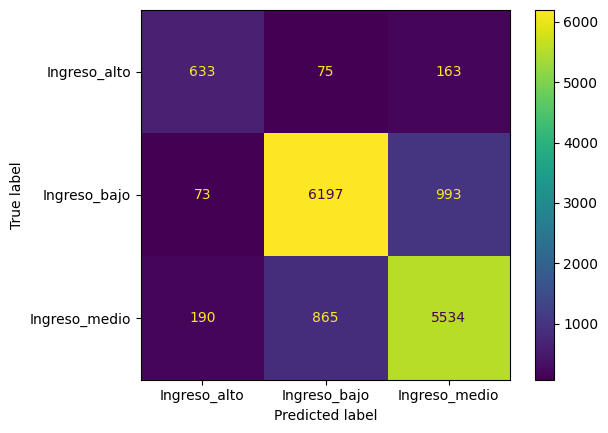

               precision    recall  f1-score   support

 Ingreso_alto       0.71      0.73      0.72       871
 Ingreso_bajo       0.87      0.85      0.86      7263
Ingreso_medio       0.83      0.84      0.83      6589

     accuracy                           0.84     14723
    macro avg       0.80      0.81      0.80     14723
 weighted avg       0.84      0.84      0.84     14723



In [407]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))

In [408]:
def plot_roc_curve(test_y, pred_y):
  """Trazar la curva ROC a partir de las respuestas correctas y las predicciones

  Args:
      test_y (ndarray of shape (n_samples,)): y
      pred_y (ndarray of shape (n_samples,)): Valor previsto para y
  """
  # Tasa de falsos positivos, tasa de verdaderos positivos
  fprs, tprs, _ = roc_curve(test_y, pred_y, pos_label=1)

  # gráfico ROC-AUC
  plt.figure(figsize=(8, 8))
  plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")
  plt.plot(fprs, tprs, color="orange", label="ROC Curve")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")

  # Rellene el área correspondiente a la puntuación ROC-AUC
  y_zeros = [0 for _ in tprs]
  plt.fill_between(fprs, y_zeros, tprs, color="orange", alpha=0.3, label="ROC-AUC")
  plt.legend()
  plt.show()

In [409]:
y_test = pd.DataFrame(y_test.to_numpy(),columns=['values'])
y_pred = pd.DataFrame(y_pred,columns=['values'])
print(y_test.head())
print(y_pred.head())

          values
0  Ingreso_medio
1  Ingreso_medio
2  Ingreso_medio
3   Ingreso_bajo
4  Ingreso_medio
          values
0   Ingreso_bajo
1  Ingreso_medio
2  Ingreso_medio
3   Ingreso_bajo
4  Ingreso_medio


In [410]:
# cat to num
y_test['values'].replace(['Ingreso_bajo', 'Ingreso_medio', 'Ingreso_alto'], [0, 1, 2], inplace=True)
y_pred['values'].replace(['Ingreso_bajo', 'Ingreso_medio', 'Ingreso_alto'], [0, 1, 2], inplace=True)
print(y_test.head())
print(y_pred.head())

   values
0       1
1       1
2       1
3       0
4       1
   values
0       0
1       1
2       1
3       0
4       1


## Arbol de decision curva ROC

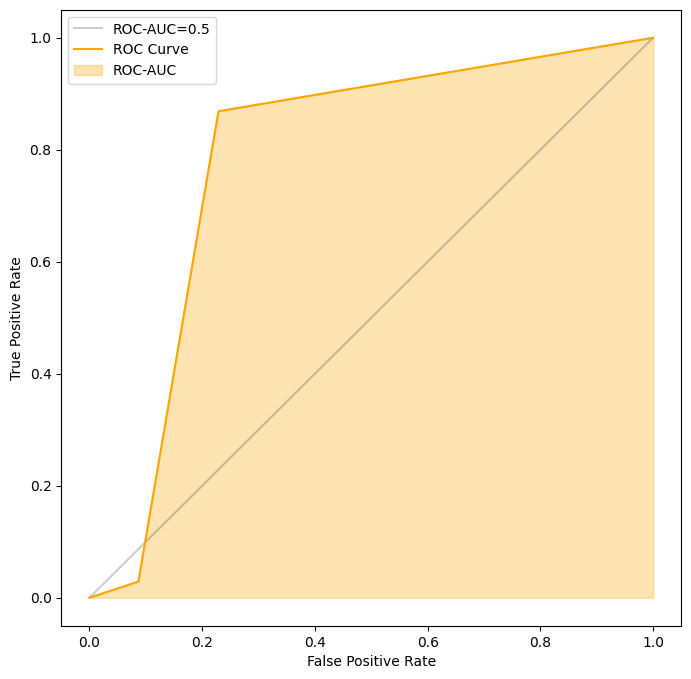

In [411]:
plot_roc_curve(y_test, y_pred)

In [412]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

# Plotting tree

#dot_data = StringIO()
#export_graphviz(clf, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('tree_ingreso.png')
#Image(graph.create_png())

# Kneibors Classifier

### Leer datos

In [413]:
data_ingreso = pd.read_csv('./clasificacion_ingreso.csv', index_col=0)
data_ingreso.head()

,hora_inicio_viaje,p31_hora_llegada,tiempo_viaje,p17_Id_motivo_viaje,p30_camino_cuadras,p30_camino_minutos,p32_lunes,p32_martes,p32_miercoles,p32_jueves,p32_viernes,p32_sabado,p32_domingo,p32_ocasional,p33_aplicacion_antes_viaje,modo_principal,etiqueta_ingresos,edad,p15v_subsidio_SITP,A-ITTP
0,0.3333,0.3542,30.0,ver a alguien,5.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,SITP,Ingreso_medio,37,4.0,180.41
2,0.2500,0.3125,90.0,trabajo,4.0,15.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,SITP,Ingreso_bajo,28,4.0,303.53
3,0.3333,0.3472,20.0,trabajo,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,SITP,Ingreso_medio,21,4.0,54.64
12,0.2292,0.2500,30.0,trabajo,10.0,30.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,A pie,Ingreso_bajo,48,4.0,1.38
13,0.6285,0.6319,5.0,trabajo,3.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,A pie,Ingreso_medio,32,4.0,379.59


### Variables categoricas a float

In [414]:
y = data_ingreso['etiqueta_ingresos']
print(y.head())

X = data_ingreso.drop('etiqueta_ingresos', axis=1)
# convert categorical variables to float
X = pd.get_dummies(X, dtype=float)
print(X.head())

0     Ingreso_medio
2      Ingreso_bajo
3     Ingreso_medio
12     Ingreso_bajo
13    Ingreso_medio
Name: etiqueta_ingresos, dtype: object
    hora_inicio_viaje  p31_hora_llegada  tiempo_viaje  p30_camino_cuadras  \
0              0.3333            0.3542          30.0                 5.0   
2              0.2500            0.3125          90.0                 4.0   
3              0.3333            0.3472          20.0                 5.0   
12             0.2292            0.2500          30.0                10.0   
13             0.6285            0.6319           5.0                 3.0   

    p30_camino_minutos  p32_lunes  p32_martes  p32_miercoles  p32_jueves  \
0                  5.0        1.0         0.0            0.0         0.0   
2                 15.0        1.0         1.0            1.0         1.0   
3                  5.0        1.0         1.0            1.0         1.0   
12                30.0        1.0         1.0            1.0         1.0   
13                

### Split dataset into training set and test set

In [415]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [416]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [417]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [418]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 199  176  496]
 [ 332 4653 2278]
 [ 642 2258 3689]]
               precision    recall  f1-score   support

 Ingreso_alto       0.17      0.23      0.19       871
 Ingreso_bajo       0.66      0.64      0.65      7263
Ingreso_medio       0.57      0.56      0.57      6589

     accuracy                           0.58     14723
    macro avg       0.47      0.48      0.47     14723
 weighted avg       0.59      0.58      0.58     14723



## Using Cross Validation to Get the Best Value of k

Text(0, 0.5, 'Accuracy Score')

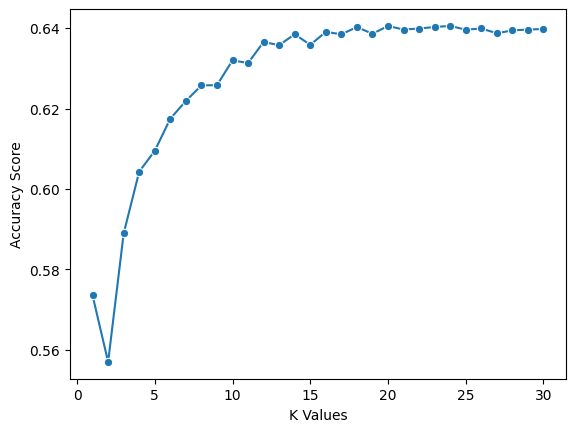

In [419]:
from sklearn.model_selection import cross_val_score
import seaborn as sns

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, X, y, cv=5)
  scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

## KNeighbors matriz de confusion y metricas

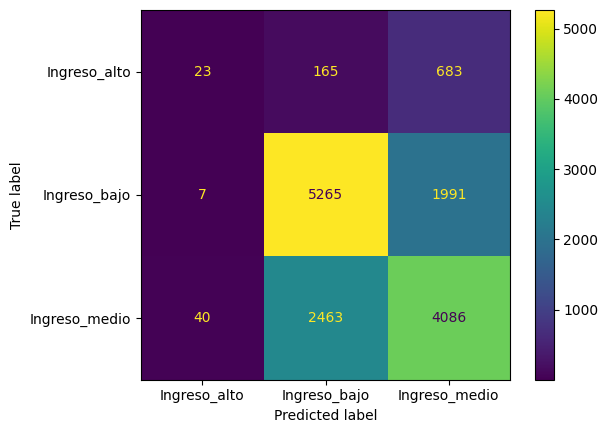

               precision    recall  f1-score   support

 Ingreso_alto       0.33      0.03      0.05       871
 Ingreso_bajo       0.67      0.72      0.69      7263
Ingreso_medio       0.60      0.62      0.61      6589

     accuracy                           0.64     14723
    macro avg       0.53      0.46      0.45     14723
 weighted avg       0.62      0.64      0.62     14723



In [420]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))

In [421]:
y_test = pd.DataFrame(y_test.to_numpy(),columns=['values'])
y_pred = pd.DataFrame(y_pred,columns=['values'])
print(y_test.head())
print(y_pred.head())

          values
0  Ingreso_medio
1  Ingreso_medio
2  Ingreso_medio
3   Ingreso_bajo
4  Ingreso_medio
          values
0   Ingreso_bajo
1  Ingreso_medio
2   Ingreso_bajo
3  Ingreso_medio
4   Ingreso_bajo


In [422]:
# cat to num
y_test['values'].replace(['Ingreso_bajo', 'Ingreso_medio', 'Ingreso_alto'], [0, 1, 2], inplace=True)
y_pred['values'].replace(['Ingreso_bajo', 'Ingreso_medio', 'Ingreso_alto'], [0, 1, 2], inplace=True)
print(y_test.head())
print(y_pred.head())

   values
0       1
1       1
2       1
3       0
4       1
   values
0       0
1       1
2       0
3       1
4       0


## KNeighbors curva ROC

### Leer datos

In [423]:
data_ingreso = pd.read_csv('./clasificacion_ingreso.csv', index_col=0)
data_ingreso.head()

,hora_inicio_viaje,p31_hora_llegada,tiempo_viaje,p17_Id_motivo_viaje,p30_camino_cuadras,p30_camino_minutos,p32_lunes,p32_martes,p32_miercoles,p32_jueves,p32_viernes,p32_sabado,p32_domingo,p32_ocasional,p33_aplicacion_antes_viaje,modo_principal,etiqueta_ingresos,edad,p15v_subsidio_SITP,A-ITTP
0,0.3333,0.3542,30.0,ver a alguien,5.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,SITP,Ingreso_medio,37,4.0,180.41
2,0.2500,0.3125,90.0,trabajo,4.0,15.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,SITP,Ingreso_bajo,28,4.0,303.53
3,0.3333,0.3472,20.0,trabajo,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,SITP,Ingreso_medio,21,4.0,54.64
12,0.2292,0.2500,30.0,trabajo,10.0,30.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,A pie,Ingreso_bajo,48,4.0,1.38
13,0.6285,0.6319,5.0,trabajo,3.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,A pie,Ingreso_medio,32,4.0,379.59


### Variables categoricas a float

In [424]:
y = data_ingreso['etiqueta_ingresos']
print(y.head())

X = data_ingreso.drop('etiqueta_ingresos', axis=1)
# convert categorical variables to float
X = pd.get_dummies(X, dtype=float)
print(X.head())

0     Ingreso_medio
2      Ingreso_bajo
3     Ingreso_medio
12     Ingreso_bajo
13    Ingreso_medio
Name: etiqueta_ingresos, dtype: object
    hora_inicio_viaje  p31_hora_llegada  tiempo_viaje  p30_camino_cuadras  \
0              0.3333            0.3542          30.0                 5.0   
2              0.2500            0.3125          90.0                 4.0   
3              0.3333            0.3472          20.0                 5.0   
12             0.2292            0.2500          30.0                10.0   
13             0.6285            0.6319           5.0                 3.0   

    p30_camino_minutos  p32_lunes  p32_martes  p32_miercoles  p32_jueves  \
0                  5.0        1.0         0.0            0.0         0.0   
2                 15.0        1.0         1.0            1.0         1.0   
3                  5.0        1.0         1.0            1.0         1.0   
12                30.0        1.0         1.0            1.0         1.0   
13                

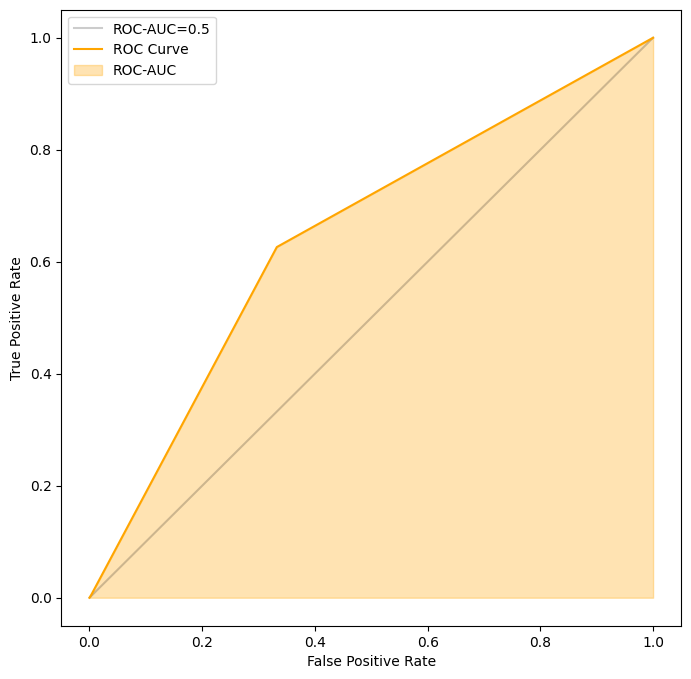

In [425]:
plot_roc_curve(y_test, y_pred)

# Naive Bayes

### Leer datos

In [431]:
data_ingreso = pd.read_csv('./clasificacion_ingreso.csv', index_col=0)
data_ingreso.head()

,hora_inicio_viaje,p31_hora_llegada,tiempo_viaje,p17_Id_motivo_viaje,p30_camino_cuadras,p30_camino_minutos,p32_lunes,p32_martes,p32_miercoles,p32_jueves,p32_viernes,p32_sabado,p32_domingo,p32_ocasional,p33_aplicacion_antes_viaje,modo_principal,etiqueta_ingresos,edad,p15v_subsidio_SITP,A-ITTP
0,0.3333,0.3542,30.0,ver a alguien,5.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,SITP,Ingreso_medio,37,4.0,180.41
2,0.2500,0.3125,90.0,trabajo,4.0,15.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,SITP,Ingreso_bajo,28,4.0,303.53
3,0.3333,0.3472,20.0,trabajo,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,SITP,Ingreso_medio,21,4.0,54.64
12,0.2292,0.2500,30.0,trabajo,10.0,30.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,A pie,Ingreso_bajo,48,4.0,1.38
13,0.6285,0.6319,5.0,trabajo,3.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,A pie,Ingreso_medio,32,4.0,379.59


### Variables categoricas a float

In [432]:
y = data_ingreso['etiqueta_ingresos']
print(y.head())

X = data_ingreso.drop('etiqueta_ingresos', axis=1)
# convert categorical variables to float
X = pd.get_dummies(X, dtype=float)
print(X.head())


0     Ingreso_medio
2      Ingreso_bajo
3     Ingreso_medio
12     Ingreso_bajo
13    Ingreso_medio
Name: etiqueta_ingresos, dtype: object
    hora_inicio_viaje  p31_hora_llegada  tiempo_viaje  p30_camino_cuadras  \
0              0.3333            0.3542          30.0                 5.0   
2              0.2500            0.3125          90.0                 4.0   
3              0.3333            0.3472          20.0                 5.0   
12             0.2292            0.2500          30.0                10.0   
13             0.6285            0.6319           5.0                 3.0   

    p30_camino_minutos  p32_lunes  p32_martes  p32_miercoles  p32_jueves  \
0                  5.0        1.0         0.0            0.0         0.0   
2                 15.0        1.0         1.0            1.0         1.0   
3                  5.0        1.0         1.0            1.0         1.0   
12                30.0        1.0         1.0            1.0         1.0   
13                

### Split dataset into training set and test set

In [433]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [434]:
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(metrics.accuracy_score(y_test, y_pred)))

Model accuracy score: 0.4080


### Check for overfitting and underfitting

In [435]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.4043
Test set score: 0.4080


The training-set accuracy score is 0.2325 while the test-set accuracy to be 0.2325. These two values are quite comparable. So, there is no sign of overfitting.

## Naive Bayes matriz de confusion y metricas

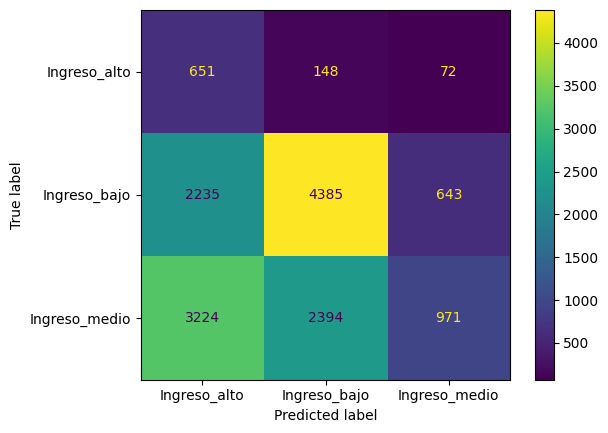

               precision    recall  f1-score   support

 Ingreso_alto       0.11      0.75      0.19       871
 Ingreso_bajo       0.63      0.60      0.62      7263
Ingreso_medio       0.58      0.15      0.23      6589

     accuracy                           0.41     14723
    macro avg       0.44      0.50      0.35     14723
 weighted avg       0.58      0.41      0.42     14723



In [436]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))

In [437]:
y_test = pd.DataFrame(y_test.to_numpy(),columns=['values'])
y_pred = pd.DataFrame(y_pred,columns=['values'])
print(y_test.head())
print(y_pred.head())

          values
0  Ingreso_medio
1  Ingreso_medio
2  Ingreso_medio
3   Ingreso_bajo
4  Ingreso_medio
         values
0  Ingreso_bajo
1  Ingreso_alto
2  Ingreso_bajo
3  Ingreso_alto
4  Ingreso_alto


In [438]:
# cat to num
y_test['values'].replace(['Ingreso_bajo', 'Ingreso_medio', 'Ingreso_alto'], [0, 1, 2], inplace=True)
y_pred['values'].replace(['Ingreso_bajo', 'Ingreso_medio', 'Ingreso_alto'], [0, 1, 2], inplace=True)
print(y_test.head())
print(y_pred.head())

   values
0       1
1       1
2       1
3       0
4       1
   values
0       0
1       2
2       0
3       2
4       2


# Naive Bayes curva ROC

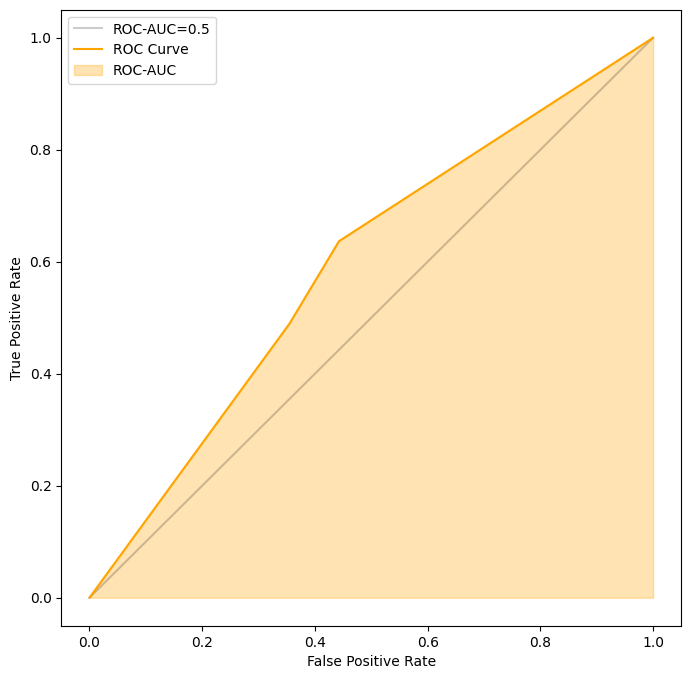

In [439]:
plot_roc_curve(y_test, y_pred)